# Machine Learning in Python

by [Piotr Migdał](http://p.migdal.pl/)

Inkubator Uniwersytetu Warszawskiego

## 6. Logistic Regression

Same dataset: https://archive.ics.uci.edu/ml/datasets/Student+Performance

* [Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression)
* [sklearn.linear_model.LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)


In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

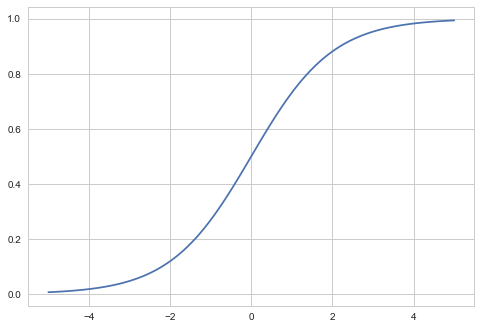

In [2]:
# logistic function
logit = np.linspace(-5, 5, num=100)
logistic = 1 / (1 + np.exp(-logit))
plt.plot(logit, logistic)

In [3]:
students = pd.read_csv("data/students_cleaner.csv")

In [4]:
# good grade
students["G"] = students["G1"] + students["G2"] + students["G3"]
students["good_G"] = students["G"] > students["G"].mean()

In [16]:
X = students.drop(['G', 'good_G', 'G1', 'G2', 'G3'], axis='columns')
Y = students['good_G']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [17]:
# more or less 50-50
Y.mean()

0.50539291217257321

In [29]:
from sklearn.model_selection import GridSearchCV

In [18]:
lr_clf = LogisticRegression(C=1.)
lr_clf.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
# accuracy on the training dataset
lr_clf.score(X_train, Y_train)

0.79629629629629628

In [20]:
# accuracy on the test dataset
lr_clf.score(X_test, Y_test)

0.66257668711656437

In [32]:
GridSearchCV?

In [33]:
gridlr = GridSearchCV(LogisticRegression(),
                      param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
                      cv=5)

In [35]:
res = gridlr.fit(X, Y)

In [38]:
res.grid_scores_

/Users/pmigdal/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.67180, std: 0.05239, params: {'C': 0.001},
 mean: 0.69954, std: 0.03469, params: {'C': 0.01},
 mean: 0.68413, std: 0.05881, params: {'C': 0.1},
 mean: 0.67334, std: 0.07952, params: {'C': 1},
 mean: 0.65485, std: 0.07657, params: {'C': 10},
 mean: 0.65485, std: 0.07657, params: {'C': 100}]

In [21]:
confusion_matrix(Y_test, lr_clf.predict(X_test))

array([[43, 30],
       [25, 65]])

In [23]:
(43 + 65) / (43 + 30 + 25 + 65)

0.6625766871165644

Text(52,0.5,'ground_truth')

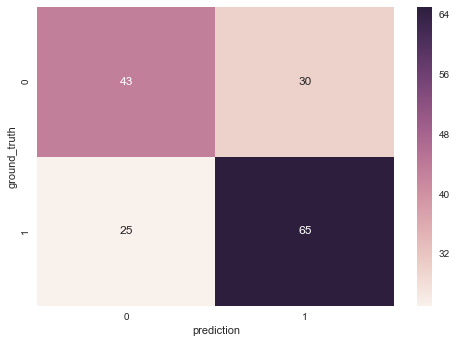

In [22]:
# confused? here it is explanation
sns.heatmap(confusion_matrix(Y_test, lr_clf.predict(X_test)), annot=True, fmt='d')
plt.xlabel("prediction")
plt.ylabel("ground_truth")

Relate it to [precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall):

![](https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg)

In [24]:
# raw predictions
lr_clf.predict(X_test)

array([ True,  True,  True,  True, False,  True,  True, False, False,
        True,  True, False,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True, False,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True, False, False,  True, False, False,
        True,  True, False, False, False, False, False,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True, False,  True, False,  True,  True,  True, False, False,
        True, False, False, False,  True,  True,  True, False,  True,
        True, False,  True,  True, False,  True, False,  True,  True,
        True, False,  True,  True, False, False, False, False,  True,
       False,  True,  True,  True,  True, False, False,  True, False,
        True, False, False,  True,  True, False,  True,  True, False,
        True, False,

In [25]:
# predicting probabilities
lr_clf.predict_proba(X_test)[:10]

array([[ 0.39701884,  0.60298116],
       [ 0.37240842,  0.62759158],
       [ 0.28259559,  0.71740441],
       [ 0.28226241,  0.71773759],
       [ 0.80920781,  0.19079219],
       [ 0.33777623,  0.66222377],
       [ 0.07601837,  0.92398163],
       [ 0.9968295 ,  0.0031705 ],
       [ 0.6425949 ,  0.3574051 ],
       [ 0.40023344,  0.59976656]])

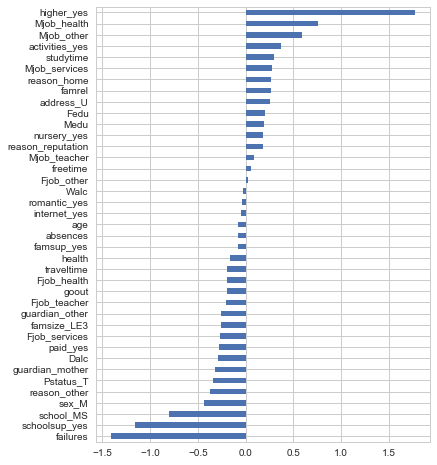

In [27]:
# danger - unweighted
pd.Series(lr_clf.coef_[0], index=X.columns).sort_values().plot('barh', figsize=(6, 8))